# Lecture 11
## ConvNet CNN
<hr/>

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

(1, 3, 3, 1)


C:\Users\che99\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


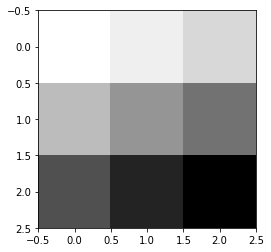

In [29]:
sess = tf.InteractiveSession()
image = np.array([[[[1], [2], [3]],
                   [[4], [5], [6]],
                   [[7], [8], [9]]]], dtype = np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap = 'Greys')

### Image : 1,3,3,1 image, Filter : 2,2,1,1, Stride : 1 X 1, Padding : VALID

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


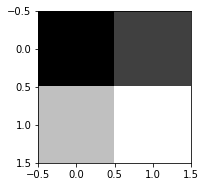

In [50]:
print('image.shape', image.shape)
weight = tf.constant([[[[1.]], [[1.]]],
                     [[[1.]], [[1.]]]])
print('weight.shape', weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides = [1, 1, 1, 1], padding = 'VALID')
conv2d_img = conv2d.eval()
print('conv2d_img.shape', conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2, 2))
    plt.subplot(1, 2, i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')

### Image : 1,3,3,1 image, Filter : 2,2,1,3  Padding : SAME

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d_img.shape (1, 3, 3, 3) 

[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]

[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]

[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]



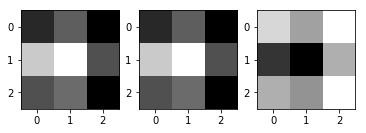

In [51]:
print('image.shape', image.shape)
weight = tf.constant([[[[1., 10., -1.]], [[1., 10., -1.]]],
                     [[[1., 10., -1.]], [[1., 10., -1.]]]])
print('weight.shape', weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides = [1, 1, 1, 1], padding = 'SAME')

conv2d_img = conv2d.eval()
print('conv2d_img.shape', conv2d_img.shape,'\n')

conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3, 3),end='\n\n')
    plt.subplot(1, 3, i+1), plt.imshow(one_img.reshape(3, 3), cmap='gray')

### MAX Pooling

In [54]:
image = np.array([[[[4], [3]],
                   [[2], [1]]]])
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='SAME')
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[4]
   [3]]

  [[2]
   [1]]]]


### using to real img

In [63]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


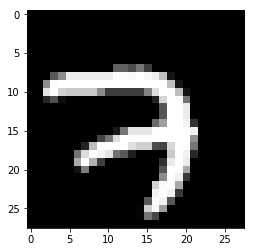

In [64]:
img = mnist.train.images[0].reshape(28, 28)
plt.imshow(img, cmap='gray')

### MNIST Convolution layer

Tensor("Conv2D_33:0", shape=(1, 14, 14, 5), dtype=float32)


C:\Users\che99\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


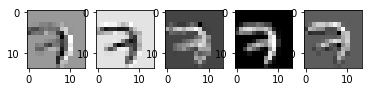

In [69]:
sess = tf.InteractiveSession()
img = img.reshape(-1,28,28,1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev=0.01))
conv2d = tf.nn.conv2d(img, W1, strides=[1,2,2,1], padding='SAME')
print(conv2d)
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0 ,3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')



### MNIST Max Pooling

Tensor("MaxPool_14:0", shape=(1, 7, 7, 5), dtype=float32)


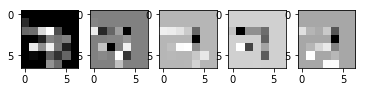

In [81]:
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')